In [84]:
import pandas as pd
data = pd.read_csv("dataset/car_data.csv")

In [4]:
data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


In [6]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
Model             0
dtype: int64

In [7]:
data.duplicated().sum()

np.int64(73)

***
#### Duplicate rows in this dataset may be expected, as multiple cars can have identical features such as brand, model, year, engine type, and mileage. These are likely different listings of the same car type rather than erroneous duplicates.
#### However, there are missing values in the Prices and EngineV columns. For a first-pass analysis, it’s reasonable to drop rows with these missing features.
***

In [85]:
data = data.dropna(subset=['Price', 'EngineV'])
data.isnull().sum()

Brand           0
Price           0
Body            0
Mileage         0
EngineV         0
Engine Type     0
Registration    0
Year            0
Model           0
dtype: int64

In [9]:
data.describe()

,Price,Mileage,EngineV,Year
count,4025.000000,4025.000000,4025.000000,4025.000000
mean,19552.308065,163.572174,2.764586,2006.379627
std,25815.734988,103.394703,4.935941,6.695595
min,600.000000,0.000000,0.600000,1969.000000
25%,6999.000000,90.000000,1.800000,2003.000000
50%,11500.000000,158.000000,2.200000,2007.000000
75%,21900.000000,230.000000,3.000000,2012.000000
max,300000.000000,980.000000,99.990000,2016.000000


In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

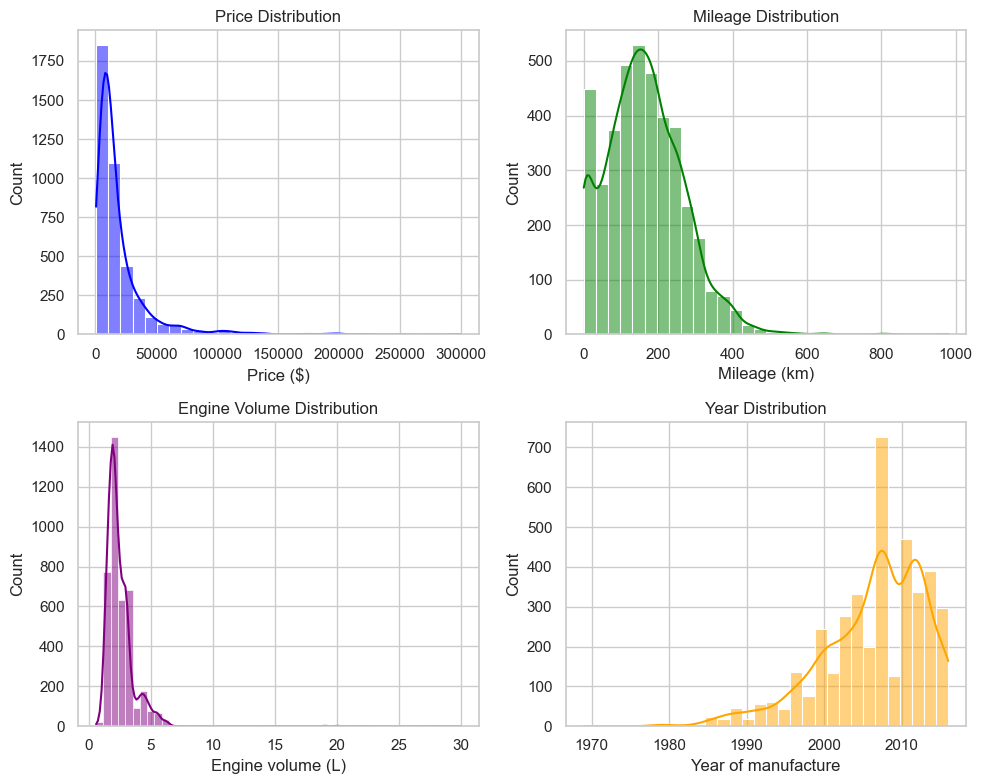

In [96]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.histplot(data['Price'], bins=30, kde=True, color='blue')
plt.title('Price Distribution')
plt.xlabel('Price ($)')

plt.subplot(2, 2, 2)
sns.histplot(data['Mileage'], bins=30, kde=True, color='green')
plt.title('Mileage Distribution')
plt.xlabel('Mileage (km)')

plt.subplot(2, 2, 3)
sns.histplot(data[data['EngineV'] < 50]['EngineV'], bins=50, kde=True, color='purple')
plt.title('Engine Volume Distribution')
plt.xlabel('Engine volume (L)')

plt.subplot(2, 2, 4)
sns.histplot(data['Year'], bins=30, kde=True, color='orange')
plt.title('Year Distribution')
plt.xlabel('Year of manufacture')

plt.tight_layout()
plt.show()

In [12]:
data['Year'].value_counts().head(3)

Year
2008    393
2012    336
2007    334
Name: count, dtype: int64

***
#### Here, we can observe the most common categories for each feature. Notably, there is a significantly higher number of cars for sale that were manufactured in 2008.
***

In [13]:
data[data.duplicated]['Year'].value_counts()

Year
2016    18
2011     8
2014     7
2015     4
2013     4
2012     4
2008     2
2010     1
2009     1
2006     1
Name: count, dtype: int64

***
#### I wanted to confirm that my decision not to clean duplicates was justified. The previous finding of a large number of cars for sale manufactured in 2008 made me question whether rows for 2008 cars were duplicated multiple times, but it seems that this is not the case.
***

In [14]:
data[data['Body'] == 'sedan'].shape[0] / data[data['Body'] == 'crossover'].shape[0]

1.8616504854368932

***
#### It appears that the most common body type is nearly twice as frequent as the second most common body type.
***

In [15]:
cdata = data[['Price', 'Mileage', 'EngineV', 'Year']]

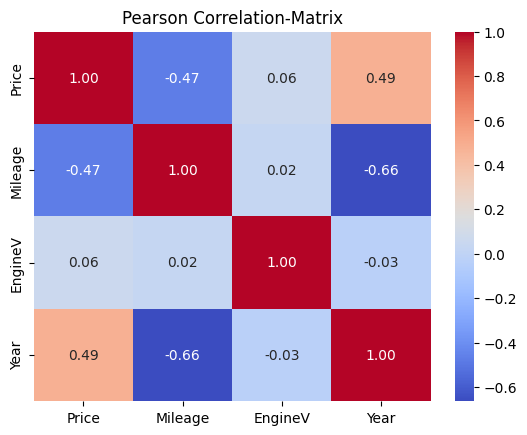

In [36]:
plt.figure()
sns.heatmap(cdata.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Pearson Correlation-Matrix")
plt.show()

***
#### As expected, price shows a positive correlation with year and a negative correlation with mileage. Year and mileage are also clearly negatively correlated. Interestingly, engine volume appears to have little impact on price.
***

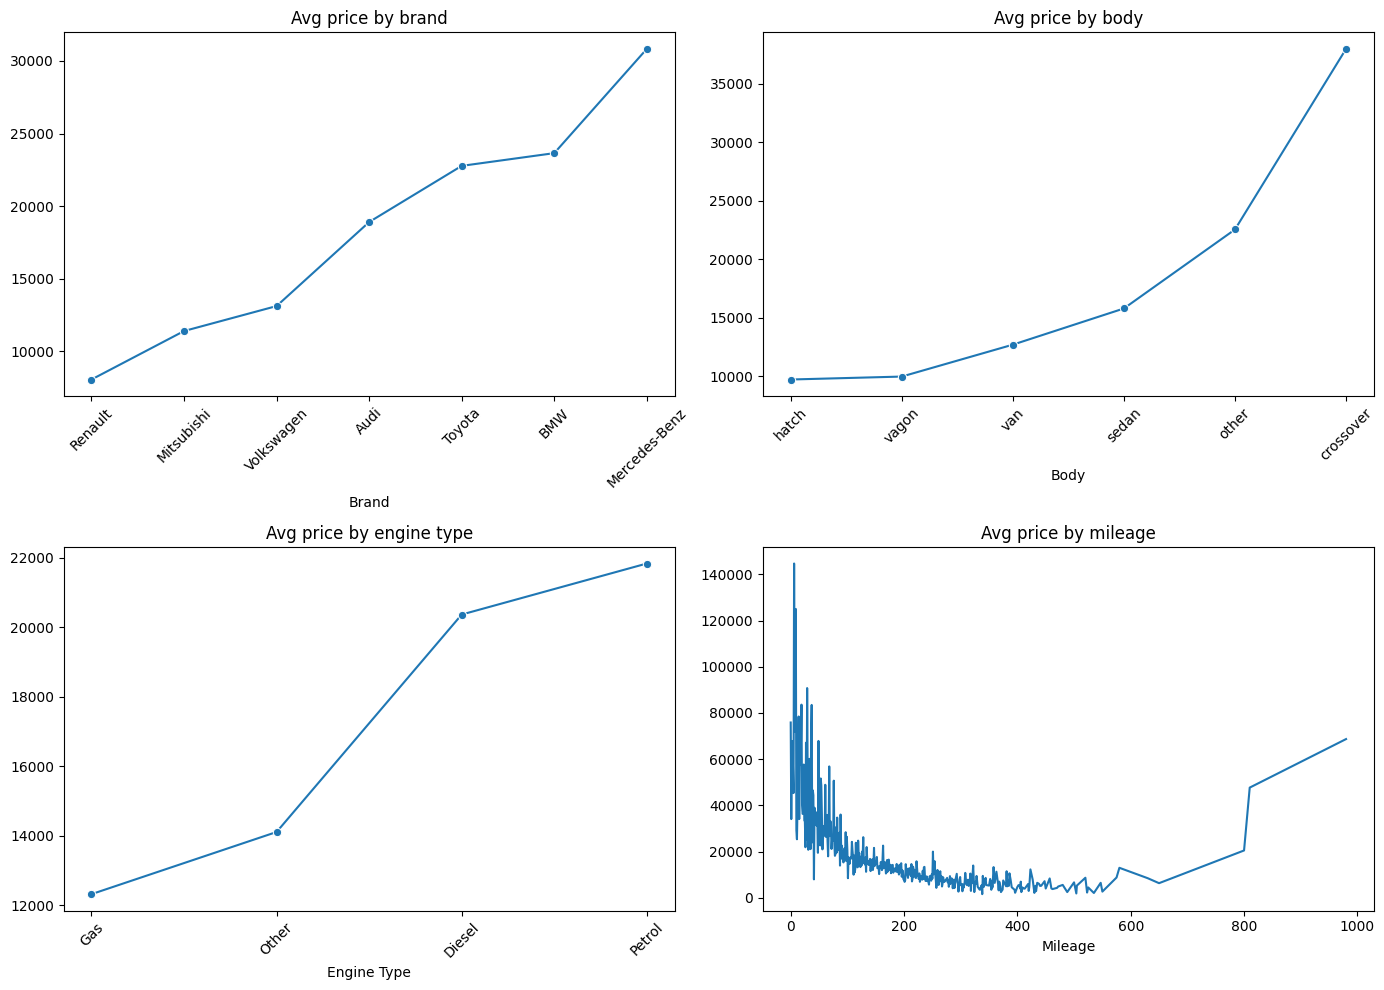

In [28]:
avg_prices_brand = data.groupby('Brand')['Price'].mean().sort_values()
avg_prices_body = data.groupby('Body')['Price'].mean().sort_values()
avg_prices_enginet = data.groupby('Engine Type')['Price'].mean().sort_values()
avg_prices_mileage = data.groupby('Mileage')['Price'].mean().sort_values()

fig, axs = plt.subplots(2, 2, figsize=(14,10))

sns.lineplot(x=avg_prices_brand.index, y=avg_prices_brand.values, ax=axs[0, 0], marker='o')
axs[0, 0].set_title('Avg price by brand')
axs[0, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=avg_prices_body.index, y=avg_prices_body.values, ax=axs[0, 1], marker='o')
axs[0, 1].set_title('Avg price by body')
axs[0, 1].tick_params(axis='x', rotation=45)

sns.lineplot(x=avg_prices_enginet.index, y=avg_prices_enginet.values, ax=axs[1, 0], marker='o')
axs[1, 0].set_title('Avg price by engine type')
axs[1, 0].tick_params(axis='x', rotation=45)

sns.lineplot(x=avg_prices_mileage.index, y=avg_prices_mileage.values, ax=axs[1, 1])
axs[1, 1].set_title('Avg price by mileage')

plt.tight_layout()
plt.show()

***
#### Interestingly, despite being generally considered a higher-end brand, Renault has the lowest average price among all brands in this dataset. As expected, BMW and Mercedes-Benz top the list with the highest average prices. Crossovers and petrol engines are associated with higher average prices in their respective categories. Low-mileage vehicles are clearly more expensive on average than those with moderate mileage—an unsurprising trend. However, there’s a noticeable and unexpected uptick in average price for cars with very high mileage.
***

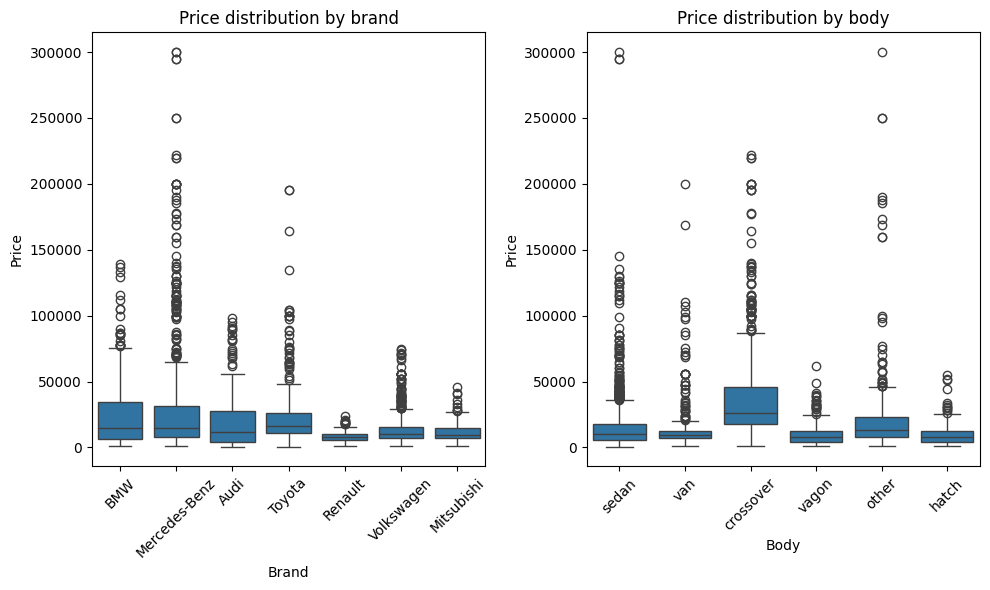

In [34]:
fig, axs = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(x='Brand', y='Price', data=data, ax=axs[0])
axs[0].set_title('Price distribution by brand')
axs[0].tick_params(axis='x', rotation=45)

sns.boxplot(x='Body', y='Price', data=data, ax=axs[1])
axs[1].set_title('Price distribution by body')
axs[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

***
#### For **brand**, **Renault** has a very narrow IQR—its prices are tightly clustered. **Mercedes-Benz** shows many high-price outliers spread over a wide range.
#### For **body**, the **Other** category has the most outliers, while **Sedan** has two extreme outliers far above the rest.
***

In [86]:
data['Registration'] = data['Registration'].map({'yes': 1, 'no': 0})
encoded_data = pd.get_dummies(data[['Brand', 'Model', 'Mileage', 'Registration', 'Year']], drop_first=True)

In [87]:
encoded_data.head()

,Mileage,Registration,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Model_100,...,Model_Vito,Model_X1,Model_X3,Model_X5,Model_X5 M,Model_X6,Model_X6 M,Model_Yaris,Model_Z3,Model_Z4
0,277,1,1991,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,427,1,1999,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,358,1,2003,False,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,240,1,2007,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,120,1,2011,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
X = encoded_data
y = data['Price']

In [89]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [90]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [94]:
print(f'Train R²: {model.score(X_train, y_train):.2f}')
print(f'Test R²: {model.score(X_test, y_test):.2f}')

Train R²: 0.76
Test R²: 0.69


***
#### We cleaned the dataset by removing rows with missing prices and selected Brand, Model, Mileage, Registration, and Year for the regression model, excluding redundant features like Body, Engine Type, and EngineV. After encoding categorical variables, we split the data into training and testing sets.
#### The model achieved a training R² score of 0.76 and a test R² score of 0.69, suggesting a good fit but with room for improvement. This model can be used for predicting car prices based on key features, useful for car dealerships, resale value predictions, or aiding buyers and sellers in making pricing decisions. Further refinement could enhance its accuracy.
***